In [2]:
import matplotlib.pyplot as plt 
import numpy as np

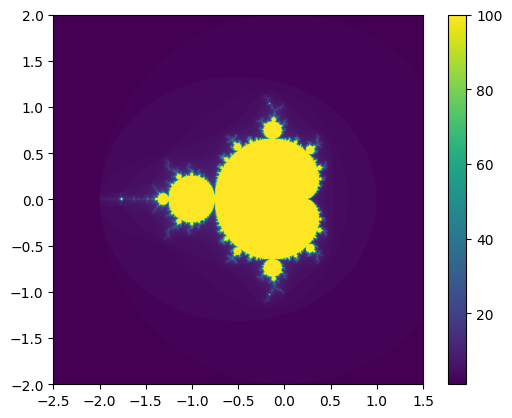

In [3]:
# Mandelbrot set identification under certain number of iteration 
def mandelbrot(c, num_iter):
    z = 0
    for n in range(num_iter):
        # The divergence condition
        if abs(z) > 2:
            return n
        z = z*z + c
    return num_iter

def compute_mandelbrot(Nx, Ny, x_min, x_max, y_min, y_max, num_iter):
    x = np.linspace(x_min, x_max, Nx)
    y = np.linspace(y_min, y_max, Ny)
    
    C = np.array(np.meshgrid(x, y)).reshape(2, Nx*Ny).T
    return np.array([mandelbrot(complex(c[0], c[1]), num_iter) for c in C]).reshape(Ny, Nx)

# Parameters for visualization
x_min, x_max = -2.5, 1.5
y_min, y_max = -2, 2
Nx, Ny = 1000, 1000
num_iter = 100

mandelbrot_image = compute_mandelbrot(Nx, Ny, x_min, x_max, y_min, y_max, num_iter)

# Visualization
plt.imshow(mandelbrot_image, extent=(x_min, x_max, y_min, y_max))
plt.colorbar()
plt.show()

## question (2)

In [6]:
import numpy as np

def mandelbrot(c, num_iter):
    z = 0
    for n in range(num_iter):
        # The divergence condition
        if abs(z) > 2:
            return n
        z = z*z + c
    return num_iter

def monte_carlo_mandelbrot_area(max_iter, max_sample, x_min, x_max, y_min, y_max):
    """Estimate the area of the Mandelbrot set using Monte Carlo integration."""
    count_in_set = 0
    for _ in range(max_sample):
        real = np.random.uniform(x_min, x_max)
        imag = np.random.uniform(y_min, y_max)
        c = complex(real, imag)
        if mandelbrot(c, max_iter) == max_iter:
            count_in_set += 1

    # Area of the region sampled
    area_sampled = (x_max - x_min) * (y_max - y_min)

    # Estimate of Mandelbrot set area
    area_estimate = area_sampled * (count_in_set / max_sample)

    return area_estimate

# Example usage
x_min, x_max = -2.5, 1.5
y_min, y_max = -2, 2

iter = 100  # Example number of iterations
samples = 100000   # Example number of samples
area_estimate = monte_carlo_mandelbrot_area(iter, samples, x_min, x_max, y_min, y_max)
print(area_estimate)


1.52352


change i

A_i,s =  1.50496
A_j,s and diff: [(100, 1.55216, 0.04719999999999991), (200, 1.53888, 0.03391999999999995), (300, 1.52432, 0.019359999999999822), (400, 1.51136, 0.006399999999999961), (500, 1.48832, -0.016639999999999988), (600, 1.50288, -0.002080000000000082), (700, 1.51664, 0.011679999999999913), (800, 1.51104, 0.006079999999999863), (900, 1.50304, -0.0019200000000001438), (1000, 1.52944, 0.024479999999999835)]


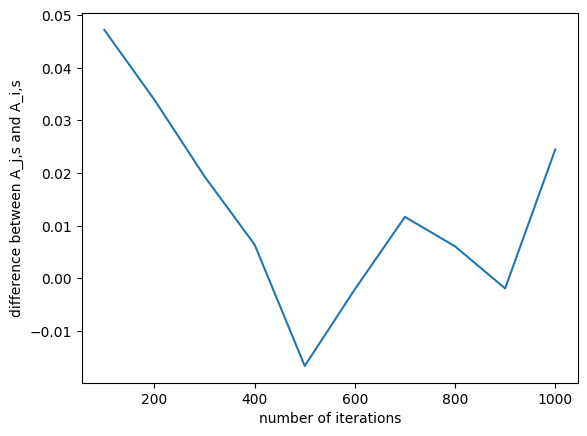

In [30]:
import matplotlib.pyplot as plt
def convergence_iter(max_iter, samples, step=100):
   
    area_i_s = monte_carlo_mandelbrot_area(max_iter, samples, x_min, x_max, y_min, y_max)
    differences = []
    # Calculate A_j,s
    for j in range(step, max_iter+1, step):
        area_j_s = monte_carlo_mandelbrot_area(j, samples, x_min, x_max, y_min, y_max)
        difference = area_j_s - area_i_s
        differences.append((j, area_j_s, difference))
    return area_i_s, differences

# Example usage
max_iterations = 1000  # Highest number of iterations
sample_size = 100000   # Number of samples
area_i_s, convergence_data = convergence_iter(max_iterations, sample_size)
j_values, area_j_s, diff = zip(*convergence_data)
plt.plot(j_values, diff)
plt.xlabel("number of iterations")
plt.ylabel("difference between A_j,s and A_i,s")
print("A_i,s = ", area_i_s)
print("A_j,s and diff:", convergence_data)


change s

[1.664, 1.648, 1.376, 1.44, 1.696, 1.44, 1.936, 1.36, 1.744, 1.472, 1.824, 1.52, 1.712, 1.344, 1.52, 1.408, 1.68, 1.456, 1.68, 1.328, 1.44, 1.568, 1.568, 1.52, 1.344, 1.344, 1.28, 1.44, 1.488, 1.616]
[1.408, 1.56, 1.376, 1.536, 1.424, 1.4, 1.528, 1.472, 1.44, 1.48, 1.52, 1.632, 1.648, 1.48, 1.584, 1.424, 1.464, 1.528, 1.704, 1.512, 1.624, 1.456, 1.504, 1.424, 1.36, 1.568, 1.6, 1.632, 1.512, 1.28]
[1.6224, 1.5008, 1.5936, 1.5008, 1.6032, 1.472, 1.4048, 1.6352, 1.4464, 1.536, 1.4976, 1.4208, 1.4944, 1.4656, 1.4368, 1.4656, 1.5776, 1.3504, 1.4368, 1.4496, 1.5328, 1.5552, 1.4432, 1.4912, 1.4624, 1.456, 1.344, 1.5584, 1.488, 1.5104]
[1.4912, 1.4832, 1.4928, 1.4704, 1.5648, 1.4352, 1.5376, 1.5456, 1.504, 1.5616, 1.4896, 1.5344, 1.464, 1.504, 1.4496, 1.472, 1.464, 1.5344, 1.472, 1.504, 1.592, 1.536, 1.5792, 1.5712, 1.4864, 1.4336, 1.5312, 1.472, 1.4928, 1.4464]
[1.5248, 1.5464, 1.5016, 1.5048, 1.52, 1.5392, 1.4992, 1.5184, 1.4904, 1.4816, 1.5136, 1.5592, 1.464, 1.5576, 1.4912, 1.504, 1.4992, 

(0.3344403751079934,
 0.42324252873372137,
 0.14346062939727433,
 0.13758724346083293,
 0.18656373618674718)

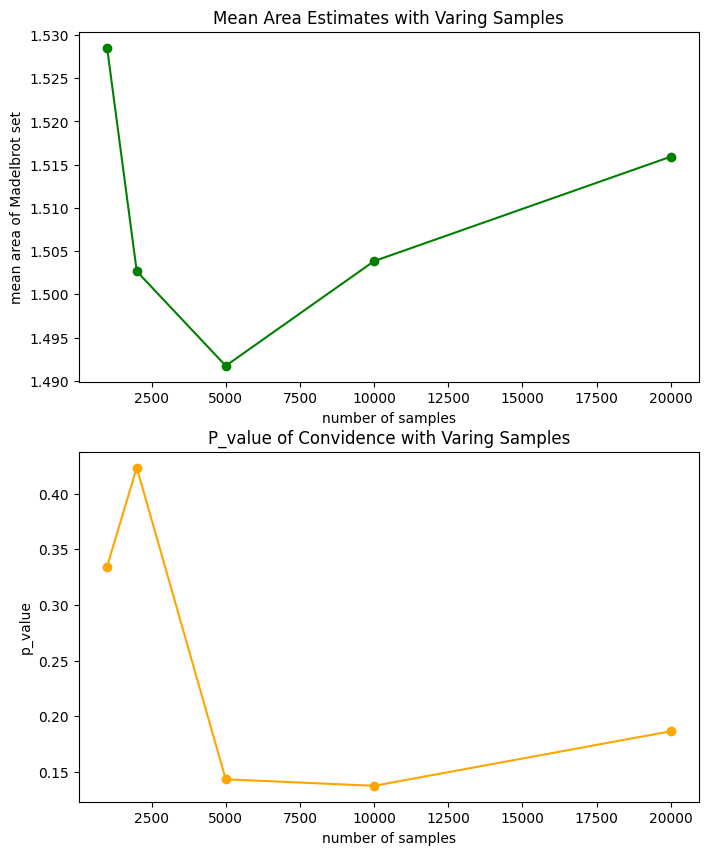

In [41]:
import scipy.stats as stats

def estimate_area_with_p_value(max_iter, samples, reference_samples, repetitions):
    """Estimate the area of the Mandelbrot set and calculate a p-value comparing it to a reference sample."""
    area_estimates = [monte_carlo_mandelbrot_area(max_iter, samples, x_min, x_max, y_min, y_max) for _ in range(repetitions)]
    reference_area_estimates = [monte_carlo_mandelbrot_area(max_iter, reference_samples, x_min, x_max, y_min, y_max) for _ in range(repetitions)]
    print(area_estimates)
    mean_area = np.mean(area_estimates)
    _, p_value = stats.ttest_ind(area_estimates, reference_area_estimates, equal_var=False)

    return mean_area, p_value

def convergence_sample_with_p_value(max_iter, sample_sizes, repetitions=30):
    convergence_data = []
    max_sample = max(sample_sizes)
    reference_area_estimates = monte_carlo_mandelbrot_area(max_iter, max_sample, x_min, x_max, y_min, y_max)

    for s in sample_sizes:
        mean_area, p_value = estimate_area_with_p_value(max_iter, s, max_sample, repetitions)
        convergence_data.append((s, mean_area, p_value))

    return convergence_data

# Example usage
max_iterations = 1000
sample_sizes = [1000, 2000, 5000, 10000, 20000]
convergence_data = convergence_sample_with_p_value(max_iterations, sample_sizes)
sample, area_j_s, p_value = zip(*convergence_data)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
ax1.plot(sample_sizes, area_j_s, '-o', color = 'green')
ax1.set_xlabel("number of samples")
ax1.set_ylabel("mean area of Madelbrot set")
ax1.set_title("Mean Area Estimates with Varing Samples")

ax2.plot(sample_sizes, p_value, '-o', color ='orange')
ax2.set_xlabel("number of samples")
ax2.set_ylabel("p_value")
ax2.set_title("P_value of Convidence with Varing Samples")
p_value

## question (3)

provide​ ​an​ ​estimate​ ​the​ ​accuracy​ ​of​ ​your​ ​computation.\
mean area estimate 

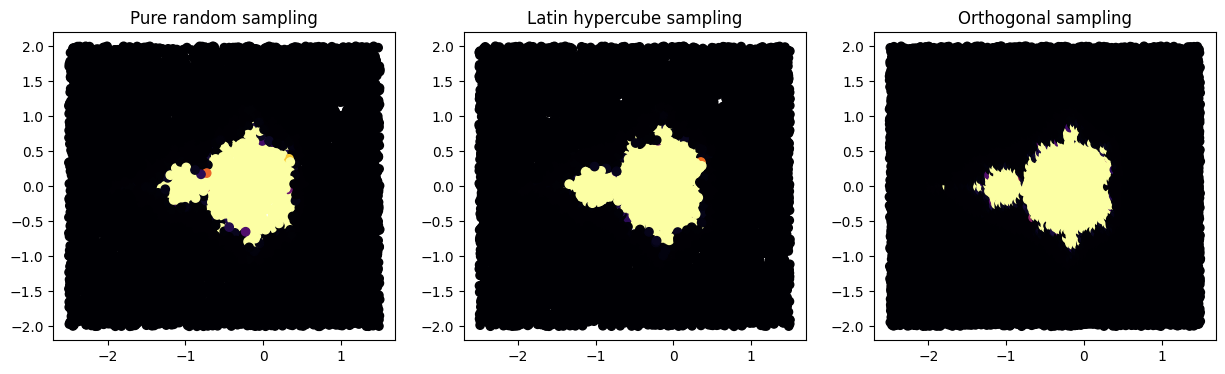

1.5424
1.536
1.5136


In [21]:
def pure_random_sampling(num_iter, num_sample, x_min, x_max, y_min, y_max):
    points = []
    count_in_set = 0
    for i in range(num_sample):
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(y_min, y_max)
        c = complex(x, y)
        m = mandelbrot(c, num_iter)
        points.append((x, y, m))
        if m == num_iter:
            count_in_set += 1
    
    area_sampled = (x_max - x_min) * (y_max - y_min)
    area_estimate = area_sampled * (count_in_set / num_sample)
    return points, area_estimate

def latin_hypercube_sampling(num_iter, num_sample, x_min, x_max, y_min, y_max):
    points = []
    count_in_set = 0
    x_intervals = np.linspace(x_min, x_max, num_sample + 1)
    y_intervals = np.linspace(y_min, y_max, num_sample + 1)

    x_choices = np.random.choice(num_sample, num_sample, replace=False)
    y_choices = np.random.choice(num_sample, num_sample, replace=False)

    for i in range(num_sample):
        x = np.random.uniform(x_intervals[x_choices[i]], x_intervals[x_choices[i] + 1])
        y = np.random.uniform(y_intervals[y_choices[i]], y_intervals[y_choices[i] + 1])
        c = complex(x, y)
        m = mandelbrot(c, num_iter)
        points.append((x, y, m))
        if m == num_iter:
            count_in_set += 1

    area_sampled = (x_max - x_min) * (y_max - y_min)
    area_estimate = area_sampled * (count_in_set / num_sample)
    return points, area_estimate

def orthogonal_sampling(num_iter, num_sample, x_min, x_max, y_min, y_max):
    points = []
    count_in_set = 0
    n_subspaces = int(np.sqrt(num_sample))
    x_subspaces = np.linspace(x_min, x_max, n_subspaces + 1)
    y_subspaces = np.linspace(y_min, y_max, n_subspaces + 1)

    for i in range(n_subspaces):
        for j in range(n_subspaces):
            x = np.random.uniform(x_subspaces[i], x_subspaces[i + 1])
            y = np.random.uniform(y_subspaces[j], y_subspaces[j + 1])
            c = complex(x, y)
            m = mandelbrot(c, num_iter)
            points.append((x, y, m))
            if m == num_iter:
                count_in_set += 1

    area_sampled = (x_max - x_min) * (y_max - y_min)
    area_estimate = area_sampled * (count_in_set / num_sample)
    return points, area_estimate


# Define the complex plane domain
x_min = -2.5
x_max = 1.5
y_min = -2
y_max = 2
num_iter = 100
num_sample = 100000


points_pure, area_pure = pure_random_sampling(num_iter, num_sample, x_min, x_max, y_min, y_max)
points_latin, area_latin = latin_hypercube_sampling(num_iter, num_sample, x_min, x_max, y_min, y_max)
points_ortho, area_orthogonal = orthogonal_sampling(num_iter, num_sample, x_min, x_max, y_min, y_max)

# Plot
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.scatter([p[0] for p in points_pure], [p[1] for p in points_pure], c=[p[2] for p in points_pure], cmap='inferno')
plt.title('Pure random sampling')
plt.subplot(1, 3, 2)
plt.scatter([p[0] for p in points_latin], [p[1] for p in points_latin], c=[p[2] for p in points_latin], cmap='inferno')
plt.title('Latin hypercube sampling')
plt.subplot(1, 3, 3)
plt.scatter([p[0] for p in points_ortho], [p[1] for p in points_ortho], c=[p[2] for p in points_ortho], cmap='inferno')
plt.title('Orthogonal sampling')
plt.show()
print(area_pure)
print(area_latin)
print(area_orthogonal)

In [23]:
import scipy.stats as stats
import numpy as np

# Assume definitions of pure_random_sampling, latin_hypercube_sampling, and orthogonal_sampling are available

def estimate_area_sampling_method(sampling_method, num_iter, num_sample, x_min, x_max, y_min, y_max, repetitions):
    """Estimate the area of the Mandelbrot set using a given sampling method."""
    area_estimates = []
    for _ in range(repetitions):
        _, area_estimate = sampling_method(num_iter, num_sample, x_min, x_max, y_min, y_max)
        area_estimates.append(area_estimate)
    return area_estimates

def compare_sampling_methods(num_iter, num_sample, repetitions):
    """Compare different sampling methods for estimating the Mandelbrot set area."""
    methods = [pure_random_sampling, latin_hypercube_sampling, orthogonal_sampling]
    area_estimates_dict = {}
    mean_areas = {}
    p_values = {}

    # Get area estimates for each method
    for method in methods:
        area_estimates = estimate_area_sampling_method(method, num_iter, num_sample, x_min, x_max, y_min, y_max, repetitions)
        area_estimates_dict[method.__name__] = area_estimates
        mean_areas[method.__name__] = np.mean(area_estimates)

    # Calculate p-values for each pair of methods
    for i in range(len(methods)):
        for j in range(i+1, len(methods)):
            method1 = methods[i].__name__
            method2 = methods[j].__name__
            _, p_value = stats.ttest_ind(area_estimates_dict[method1], area_estimates_dict[method2], equal_var=False)
            p_values[f"{method1} vs {method2}"] = p_value

    return mean_areas, p_values

# Example usage
max_iterations = 100
num_sample = 100000
repetitions = 30

mean_areas, p_values = compare_sampling_methods(max_iterations, num_sample, repetitions)
print("Mean Areas:", mean_areas)
print("P-values:", p_values)


Mean Areas: {'pure_random_sampling': 1.5479093333333334, 'latin_hypercube_sampling': 1.545568, 'orthogonal_sampling': 1.5450400000000002}
P-values: {'pure_random_sampling vs latin_hypercube_sampling': 0.4920403267684048, 'pure_random_sampling vs orthogonal_sampling': 0.3104700798997694, 'latin_hypercube_sampling vs orthogonal_sampling': 0.7929967992601145}


Standard Deviations: {'pure_random_sampling': 0.015353594960862516, 'latin_hypercube_sampling': 0.01218677286605806, 'orthogonal_sampling': 0.0019414285690925713}


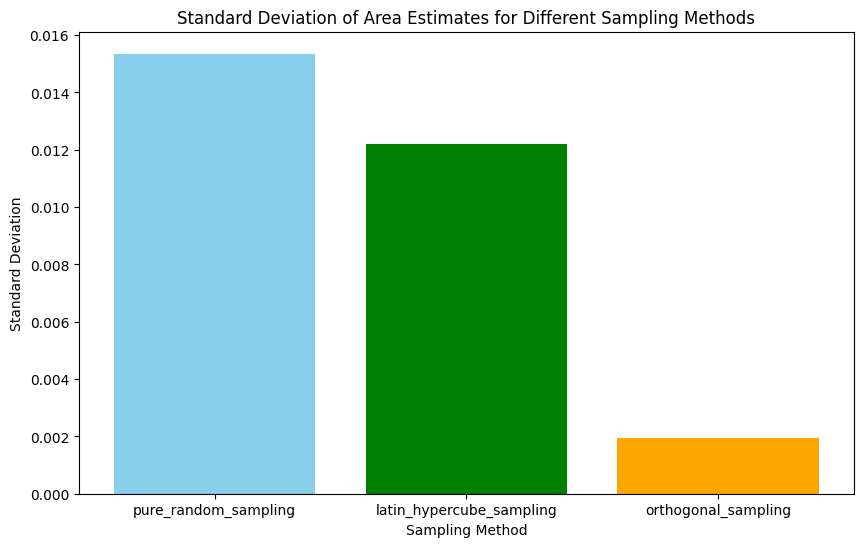

In [35]:
def estimate_area_sampling_method(sampling_method, num_iter, num_sample, x_min, x_max, y_min, y_max, repetitions):
    """Estimate the area of the Mandelbrot set using a given sampling method."""
    area_estimates = []
    for _ in range(repetitions):
        _, area_estimate = sampling_method(num_iter, num_sample, x_min, x_max, y_min, y_max)
        area_estimates.append(area_estimate)
    return area_estimates

def analyze_sampling_methods(num_iter, num_sample, repetitions):
    """Analyze different sampling methods for estimating the Mandelbrot set area."""
    methods = [pure_random_sampling, latin_hypercube_sampling, orthogonal_sampling]
    standard_deviations = {}

    for method in methods:
        area_estimates = estimate_area_sampling_method(method, num_iter, num_sample, x_min, x_max, y_min, y_max, repetitions)
        standard_deviations[method.__name__] = np.std(area_estimates)

    return standard_deviations

# Example usage
max_iterations = 100
num_sample = 100000
repetitions = 30

std_deviations = analyze_sampling_methods(max_iterations, num_sample, repetitions)
print("Standard Deviations:", std_deviations)

# Plotting standard deviations
methods = list(std_deviations.keys())
std_values = list(std_deviations.values())

plt.figure(figsize=(10, 6))
plt.bar(methods, std_values, color=['skyblue', 'g', 'orange'])
plt.title("Standard Deviation of Area Estimates for Different Sampling Methods")
plt.xlabel("Sampling Method")
plt.ylabel("Standard Deviation")
plt.show()

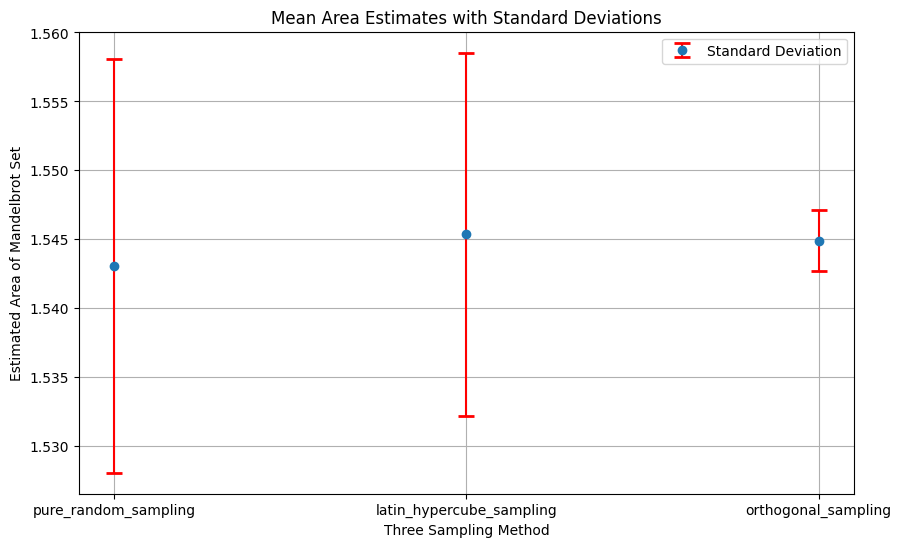

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Assume definitions of pure_random_sampling, latin_hypercube_sampling, and orthogonal_sampling are available

def estimate_area_sampling_method(sampling_method, num_iter, num_sample, x_min, x_max, y_min, y_max, repetitions):
    """Estimate the area of the Mandelbrot set using a given sampling method."""
    area_estimates = []
    for _ in range(repetitions):
        _, area_estimate = sampling_method(num_iter, num_sample, x_min, x_max, y_min, y_max)
        area_estimates.append(area_estimate)
    return area_estimates

def analyze_sampling_methods(num_iter, num_sample, repetitions):
    """Analyze different sampling methods for estimating the Mandelbrot set area."""
    methods = [pure_random_sampling, latin_hypercube_sampling, orthogonal_sampling]
    mean_areas = {}
    standard_deviations = {}

    # Get area estimates for each method and calculate statistics
    for method in methods:
        area_estimates = estimate_area_sampling_method(method, num_iter, num_sample, x_min, x_max, y_min, y_max, repetitions)
        mean_areas[method.__name__] = np.mean(area_estimates)
        standard_deviations[method.__name__] = np.std(area_estimates)

    return mean_areas, standard_deviations


# Example usage
max_iterations = 100
num_sample = 100000
repetitions = 30

mean_areas, standard_deviations = analyze_sampling_methods(max_iterations, num_sample, repetitions)
   
   
methods = list(mean_areas.keys())
means = list(mean_areas.values())
std_devs = list(standard_deviations.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(methods, means, yerr=std_devs, fmt='o', capsize=6, capthick=2, ecolor='red', label='Standard Deviation')
plt.title("Mean Area Estimates with Standard Deviations")
plt.xlabel("Three Sampling Method")
plt.ylabel("Estimated Area of Mandelbrot Set")
plt.legend()
plt.grid(True)
plt.show()



In [27]:
mean_areas, standard_deviations

({'pure_random_sampling': 1.5468853333333332,
  'latin_hypercube_sampling': 1.5487946666666668,
  'orthogonal_sampling': 1.544704},
 {'pure_random_sampling': 0.012581161507940702,
  'latin_hypercube_sampling': 0.014150459058120894,
  'orthogonal_sampling': 0.0020949615748266106})

In [16]:
import numpy as np
import scipy.stats as stats

# Assume definitions of pure_random_sampling, latin_hypercube_sampling, and orthogonal_sampling are available

def estimate_area_sampling_method(sampling_method, num_iter, num_sample, x_min, x_max, y_min, y_max, repetitions):
    """Estimate the area of the Mandelbrot set using a given sampling method."""
    area_estimates = []
    for _ in range(repetitions):
        _, area_estimate = sampling_method(num_iter, num_sample, x_min, x_max, y_min, y_max)
        area_estimates.append(area_estimate)
    return area_estimates

def calculate_confidence_interval(area_estimates, confidence_level=0.95):
    """Calculate the confidence interval for a set of area estimates."""
    mean_area = np.mean(area_estimates)
    std_error = stats.sem(area_estimates)
    margin_of_error = std_error * stats.t.ppf((1 + confidence_level) / 2, len(area_estimates) - 1)
    lower_bound = mean_area - margin_of_error
    upper_bound = mean_area + margin_of_error
    return lower_bound, upper_bound

def analyze_sampling_methods(num_iter, num_sample, repetitions):
    """Analyze different sampling methods for estimating the Mandelbrot set area."""
    methods = [pure_random_sampling, latin_hypercube_sampling, orthogonal_sampling]
    confidence_intervals = {}

    for method in methods:
        area_estimates = estimate_area_sampling_method(method, num_iter, num_sample, x_min, x_max, y_min, y_max, repetitions)
        confidence_intervals[method.__name__] = calculate_confidence_interval(area_estimates)

    return confidence_intervals

# Example usage
max_iterations = 1000
num_sample = 10000
repetitions = 30

confidence_intervals = analyze_sampling_methods(max_iterations, num_sample, repetitions)
print("Confidence Intervals:", confidence_intervals)


Confidence Intervals: {'pure_random_sampling': (1.477006671908579, 1.5131799947580877), 'latin_hypercube_sampling': (1.4991479433221528, 1.532105390011181), 'orthogonal_sampling': (1.5049927755906602, 1.5129272244093395)}


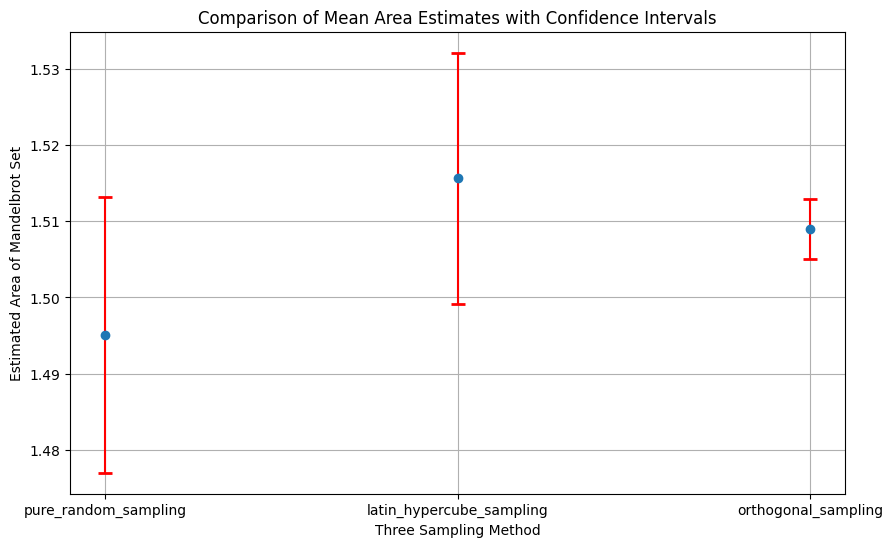

In [39]:
# Extracting mean areas and confidence interval bounds
methods = list(confidence_intervals.keys())
mean_areas = [(ci[0] + ci[1]) / 2 for ci in confidence_intervals.values()]
lower_bounds = [mean_areas[i] - confidence_intervals[methods[i]][0] for i in range(len(methods))]
upper_bounds = [confidence_intervals[methods[i]][1] - mean_areas[i] for i in range(len(methods))]

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(methods, mean_areas, yerr=[lower_bounds, upper_bounds], fmt='o', capsize=5, capthick=2, ecolor='red')
plt.title("Comparison of Mean Area Estimates with Confidence Intervals")
plt.xlabel("Three Sampling Method")
plt.ylabel("Estimated Area of Mandelbrot Set")
plt.grid(True)
plt.show()
